In [59]:
# Import the necessary libraries

import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline

In [60]:
stocks = ['KO', '^GSPC']
portfolio_data = pd.DataFrame()

for t in stocks:
    portfolio_data[t] = wb.DataReader(t, data_source = 'yahoo', start = '2000-1-1')['Adj Close']

In [61]:
stocks_data

,KO,^GSPC
Date,,
2000-01-03,11.907217,1455.219971
2000-01-04,11.920419,1399.420044
2000-01-05,12.026028,1402.109985
2000-01-06,12.039227,1403.449951
2000-01-07,12.831279,1441.469971
...,...,...
2020-08-24,47.970001,3431.280029
2020-08-25,47.910000,3443.620117
2020-08-26,48.160000,3478.729980


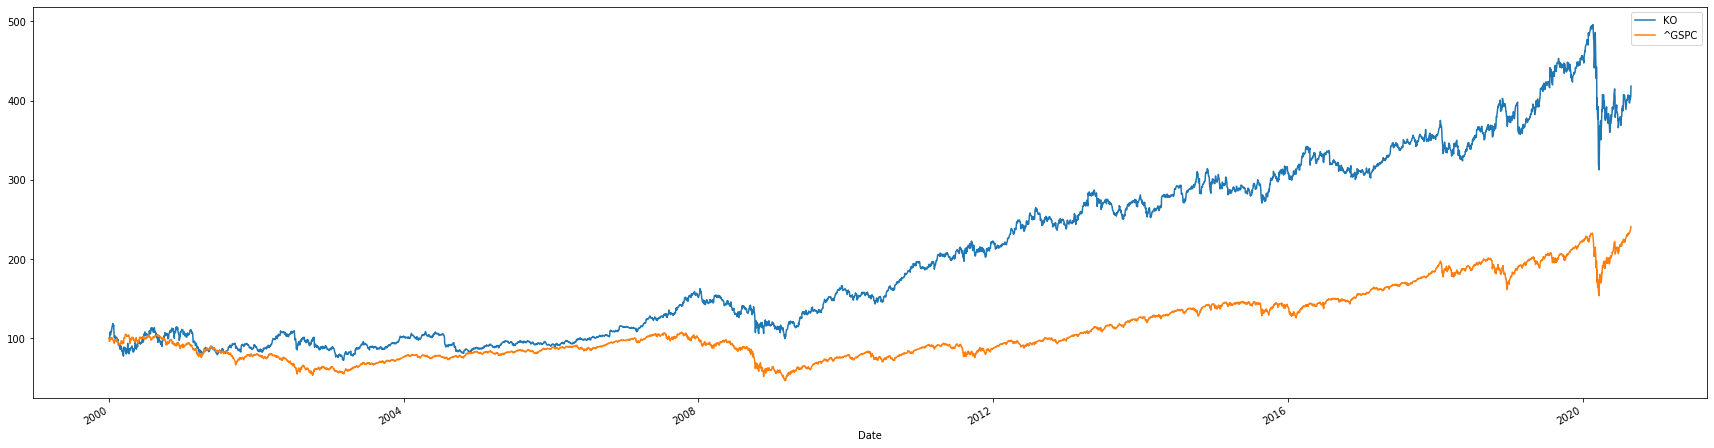

In [62]:
(portfolio_data / portfolio_data.iloc[0] * 100).plot(figsize = (30,8))
plt.show()

In [63]:
simple_return_daily = (portfolio_data / portfolio_data.shift(1)) - 1
simple_return_daily

,KO,^GSPC
Date,,
2000-01-03,NaN,NaN
2000-01-04,0.001109,-0.038345
2000-01-05,0.008859,0.001922
2000-01-06,0.001098,0.000956
2000-01-07,0.065789,0.027090
...,...,...
2020-08-24,0.014594,0.010044
2020-08-25,-0.001251,0.003596
2020-08-26,0.005218,0.010196


In [64]:
simple_return_annual = simple_return_daily.mean() * 250
simple_return_annual

KO       0.091407
^GSPC    0.062040
dtype: float64

In [65]:
simple_return_daily.cov()

,KO,^GSPC
KO,0.000180,0.000087
^GSPC,0.000087,0.000157


In [66]:
simple_return_daily.corr()

,KO,^GSPC
KO,1.000000,0.518737
^GSPC,0.518737,1.000000


In [67]:
number_stocks = len(stocks)
number_stocks

2

In [68]:
arr = np.random.random(2)
arr

array([0.42944884, 0.91115746])

In [69]:
arr[0] + arr[1]

1.3406062996186727

In [70]:
weights = np.random.random(number_stocks)
weights /= np.sum(weights)
weights

array([0.85283144, 0.14716856])

In [71]:
weights[0] + weights[1]

1.0

## Expected Portfolio Return

In [72]:
np.sum(weights * simple_return_daily.mean()) * 250

0.08708524860791916

## Expected Portfolio Volatility 

In [73]:
np.sqrt(np.dot(weights.T, np.dot(simple_return_daily.cov() * 250, weights)))

0.19778257885891118

In [74]:
portfolio_returns = []
portfolio_volatility = []

for x in range(1000):
    weights = np.random.random(number_stocks)
    weights /= np.sum(weights)
    portfolio_returns.append(np.sum(weights * simple_return_daily.mean()) * 250)
    portfolio_volatility.append(np.sqrt(np.dot(weights.T, np.dot(simple_return_daily.cov() * 250, weights))))

In [75]:
portfolio_returns = np.array(portfolio_returns)
portfolio_volatility = np.array(portfolio_volatility)

In [76]:
portfolios = pd.DataFrame({'Return': portfolio_returns, 'Volatility': portfolio_volatility})
portfolios.head()

,Return,Volatility
0,0.069971,0.181285
1,0.085736,0.193961
2,0.079003,0.180879
3,0.077515,0.179475
4,0.075374,0.178466


Text(0, 0.5, 'Expected Return')

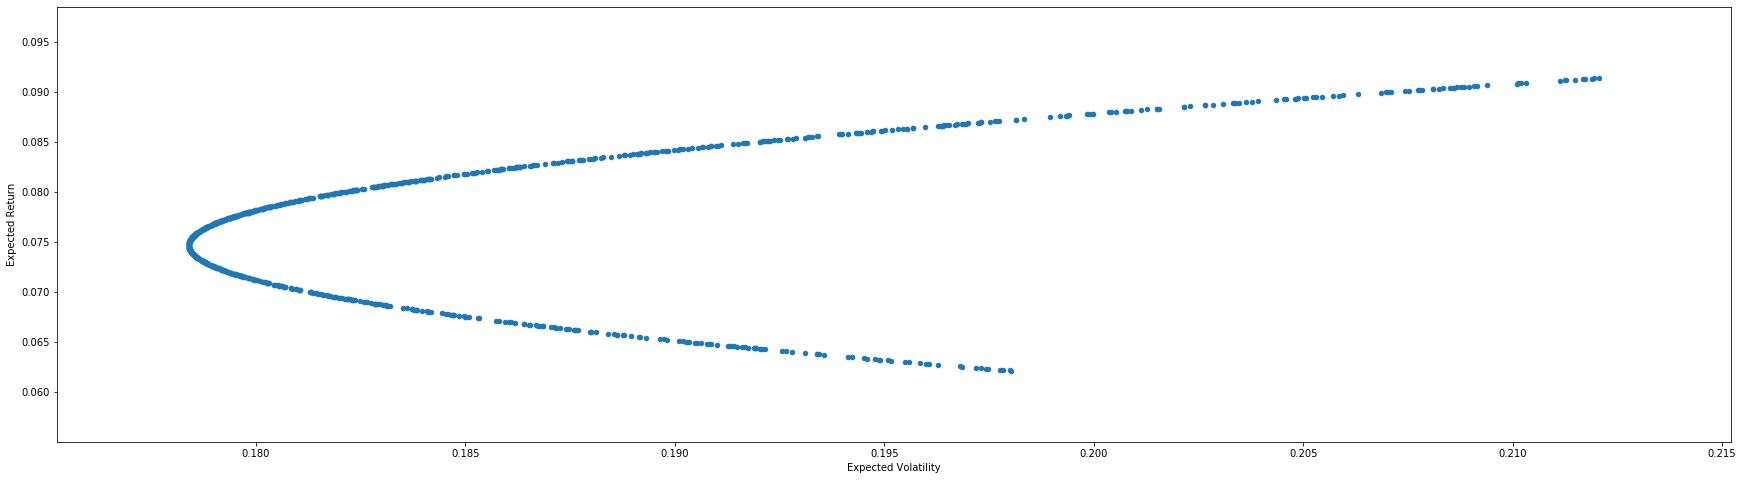

In [78]:
portfolios.plot(x = 'Volatility', y = "Return", kind = 'scatter', figsize = (30, 8))
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')